In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
import numpy as np
import pytorch_lightning as pl
import torch

from func2graph import models, data

### Load Trained Model

In [3]:
AA = models.Attention_Autoencoder(
    neuron_num=200,
    window_size=200,
    heads=1,
    attention_layers=1,
    dim_key=200,
    pos_enc_type="lookup_table",
    predict_window_size=1,
    prediction_mode=True,
    attention_activation="none",
    causal_temporal_map="none",     # "none", "lower_triangle", "off_diagonal", "off_diagonal_1"
    causal_temporal_map_diff=1,     ###########
    l1_on_causal_temporal_map = 0,  ###########
)

AwC = models.Attention_With_Constraint_sim(
    neuron_num=200,
    num_cell_types=4,
    window_size=200,
    attention_layers=1,
    pos_enc_type="lookup_table",
    predict_window_size=1,
    attention_activation="none",
    causal_temporal_map = 'none',   # 'none', 'off_diagonal_1', 'off_diagonal', 'lower_triangle'
    causal_temporal_map_diff = 1,   ###########
    l1_on_causal_temporal_map = 0,  ###########
    constraint_loss_weight = 1,     ###########
    constraint_var = 1,             ###########
)

In [4]:
predict_mode_model = AwC    ###########
model_checkpoint_path = "../../output/3_27_AwC/AwC_sim_2.0_1_wuwei_200_200_42_42_1_none_lookup_table_none_1_5e-05_0.001_cycle_mse_0.0_0.1_0.0/epoch=499-step=372000.ckpt"

model_checkpoint = predict_mode_model.load_from_checkpoint(model_checkpoint_path)
model_checkpoint.eval()
print(model_checkpoint)

Attention_With_Constraint_sim(
  (embedding_table): Embedding(200, 199)
  (layer_norm): LayerNorm((199,), eps=1e-05, elementwise_affine=True)
  (attentionlayers): ModuleList(
    (0): Sequential(
      (0): Causal_Temporal_Map_Attention(
        (W_Q_W_KT): Linear(in_features=199, out_features=199, bias=False)
        (attn_dropout): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Sequential(
      (0): LayerNorm((199,), eps=1e-05, elementwise_affine=True)
    )
  )
  (out): Linear(in_features=199, out_features=1, bias=True)
)


### Get TT Matrix

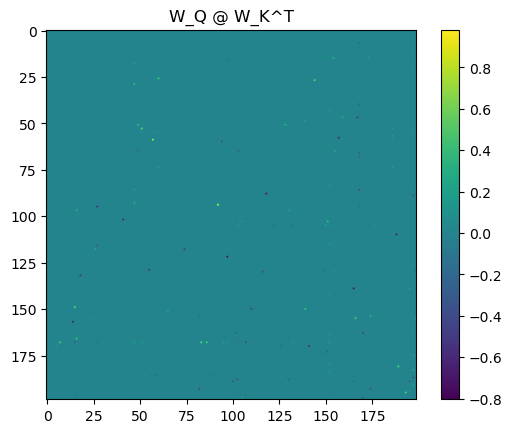

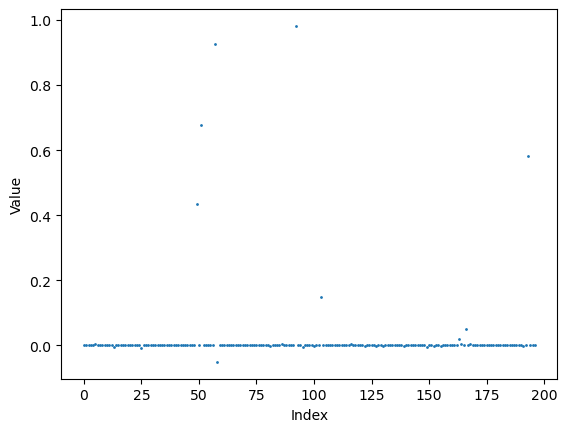

In [5]:
TT = model_checkpoint.attentionlayers[0][0].W_Q_W_KT.weight.cpu().detach().numpy()

tau = 2   ###########

TT = TT.T  # This is important!!!! because torch.Linear.weight is (output_dim, input_dim)

plt.imshow(TT)
plt.title("W_Q @ W_K^T")
plt.colorbar()
plt.show()

# print diagnal
l = list()
for i in range(tau, TT.shape[0]):
    l.append(TT[i][i-tau])  #########################

plt.scatter(range(len(l)), l, s=1)
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()